# BH score

This is a demo script replicating the main results of [Nonaka et al. (2020) Brain hierarchy score: Which deep neural networks are hierarchically brain-like?](https://www.biorxiv.org/content/10.1101/2020.07.22.216713v2).

In [1]:
import os
import json
from itertools import product

import hdf5storage

from bhscore import compute_bhscore, random_sample_bhscore

In [2]:
# Settings
with open('settings.json', 'r') as f:
    settings = json.load(f)

networks = settings['dnns']

subjects = settings['subjects']
rois = settings['rois']

decoding_accuracy_dir = './data/decoding_accuracy_shared/ImageNetTest'

In [3]:
# Load decoding accuracy
decoding_accuracy = {}

for net_name, net in networks.items():
    layers = net['layers']

    acc_net = []
    for lay in layers:

        acc_layer = []  # This should be a 2-d array of ROIs x units.

        for roi in rois:
            acc_roi = []

            # Pool decoding accuracies across subjects
            for sub in subjects:
                acc_file = os.path.join(decoding_accuracy_dir, net['dir'], lay, sub, roi, 'accuracy.mat')
                acc = hdf5storage.loadmat(acc_file)['accuracy'].flatten()
                acc_roi.append(acc)
            #acc_roi = np.hstack(acc_roi)[:, np.newaxis]
            acc_roi = np.hstack(acc_roi)
            acc_layer.append(acc_roi)

        #acc_layer = np.hstack(acc_layer)
        acc_layer = np.vstack(acc_layer)
        acc_net.append(acc_layer)

    decoding_accuracy.update({net_name: acc_net})


In [4]:
# Calculate BH scores
bh_scores = {}

for net in networks:
    #bh_score, best_roi = compute_bhscore(decoding_accuracy[net], pval_threshold=0.05)
    bh_score = np.mean(random_sample_bhscore(decoding_accuracy[net], pval_threshold=0.05))
    bh_scores.update({net: bh_score})
    print('{}: {}'.format(net, bh_score))

CORnet-Z: 0.300907251429
CORnet-R: 0.457444450926
Inception-ResNet-v2: 0.194732964636
ResNet-18: 0.437574052292
PNASNet-Large: 0.185969776936
DenseNet-201: 0.406995065334
DenseNet-169: 0.382170025039
ResNet-152-v2: 0.137954425961
Inception-v1: 0.265579328028
Inception-v2: 0.245651701488
Inception-v3: 0.0423788500003
Inception-v4: 0.0413525203801
DenseNet-161: 0.400896144991
MobileNet-v2-1.4-224: 0.201883741628
ResNet-101-v2: 0.146685899844
DenseNet-121: 0.408415758345
ResNet-50-v2: 0.184076242729
VGG-19: 0.477662128851
CORnet-S: 0.446676075429
VGG-16: 0.447376975743
VGG-S: 0.534454322259
SqueezeNet-1.1: 0.377546616644
SqueezeNet-1.0: 0.470330058295
VGG-M: 0.519905426528
VGG-F: 0.514418424841
AlexNet: 0.494876482976
NASNet-Large: 0.0805470846237
NASNet-Mobile: 0.197280062798
ResNet-34: 0.411014118139


VGG-S: 0.534454322259
VGG-M: 0.519905426528
VGG-F: 0.514418424841
AlexNet: 0.494876482976
VGG-19: 0.477662128851
SqueezeNet-1.0: 0.470330058295
CORnet-R: 0.457444450926
VGG-16: 0.447376975743
CORnet-S: 0.446676075429
ResNet-18: 0.437574052292
ResNet-34: 0.411014118139
DenseNet-121: 0.408415758345
DenseNet-201: 0.406995065334
DenseNet-161: 0.400896144991
DenseNet-169: 0.382170025039
SqueezeNet-1.1: 0.377546616644
CORnet-Z: 0.300907251429
Inception-v1: 0.265579328028
Inception-v2: 0.245651701488
MobileNet-v2-1.4-224: 0.201883741628
NASNet-Mobile: 0.197280062798
Inception-ResNet-v2: 0.194732964636
PNASNet-Large: 0.185969776936
ResNet-50-v2: 0.184076242729
ResNet-101-v2: 0.146685899844
ResNet-152-v2: 0.137954425961
NASNet-Large: 0.0805470846237
Inception-v3: 0.0423788500003
Inception-v4: 0.0413525203801


([], <a list of 0 Text xticklabel objects>)

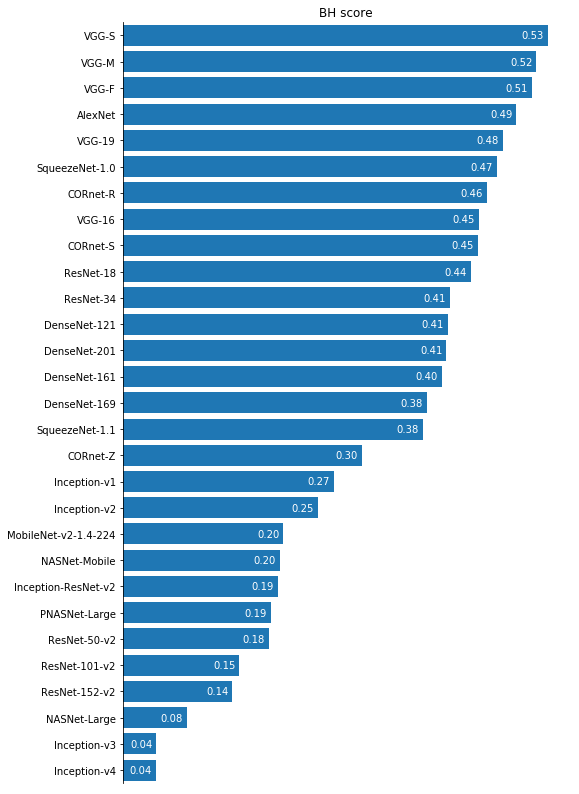

In [5]:
# Display BH score ranking

nets = np.array([n for n in bh_scores.keys()])
bhscores = np.array([s for s in bh_scores.values()])

ranking_index = np.argsort(bhscores)[::-1]
nets = nets[ranking_index]
bhscores = bhscores[ranking_index]

for net, bhscore in zip(nets, bhscores):
    print('{}: {}'.format(net, bhscore))

# Bar chart

fig = plt.figure(figsize=(8, 14))

ypos = range(nets.shape[0])[::-1]

plt.barh(ypos, bhscores)

plt.title('BH score')

plt.yticks(ypos, nets)
plt.ylim([-0.5, nets.shape[0] - 0.5])

for yp, bhs in zip(ypos, bhscores):
    plt.text(bhs - 0.005, yp, '%.2f' % bhs, color='white',
             horizontalalignment='right',
             verticalalignment='center')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([])